In [1]:
# importing of packages--
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
# read the data file
def read_data():
    data=pd.read_csv("C:/top mentor data sci assignmets/14 may/delivery_time.csv")
    return data

In [3]:
# calling the function--
data= read_data()
print(data.head(5))

   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10


In [4]:
#renaming columns--
data=data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
print(data.head(5))

   delivery_time  sorting_time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10


In [5]:
#reindexing columns--
order=["sorting_time","delivery_time"]
data=data.reindex(columns=order)
print(data.head())

   sorting_time  delivery_time
0            10          21.00
1             4          13.50
2             6          19.75
3             9          24.00
4            10          29.00


In [6]:
# checking for missing values--
data.isnull().sum()

sorting_time     0
delivery_time    0
dtype: int64

In [7]:
# print basic info about data--
print(data.columns)
print("Data types---")
print("==========================")
print(data.dtypes)
print("==========================")
print("Info---")
print(data.info())
print("==========================")

Index(['sorting_time', 'delivery_time'], dtype='object')
Data types---
sorting_time       int64
delivery_time    float64
dtype: object
Info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sorting_time   21 non-null     int64  
 1   delivery_time  21 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes
None


<AxesSubplot:xlabel='sorting_time'>

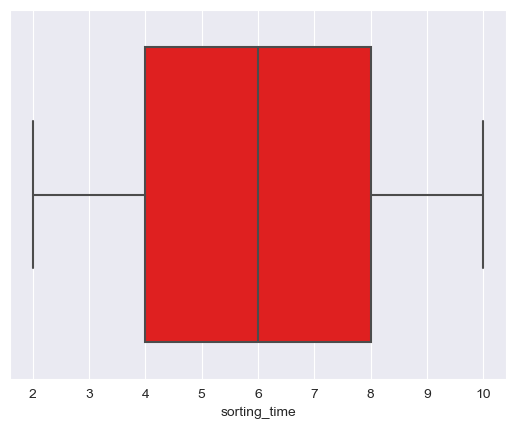

In [8]:
# EDA
# checking for outliers--
sns.boxplot(x=data["sorting_time"],color="red")

<AxesSubplot:xlabel='delivery_time'>

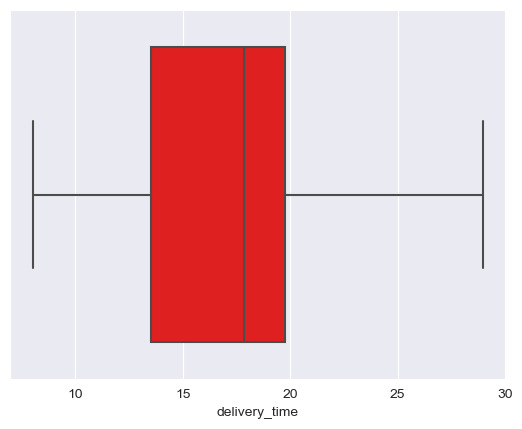

In [9]:
sns.boxplot(x=data["delivery_time"],color="red")

0.047115474210530174


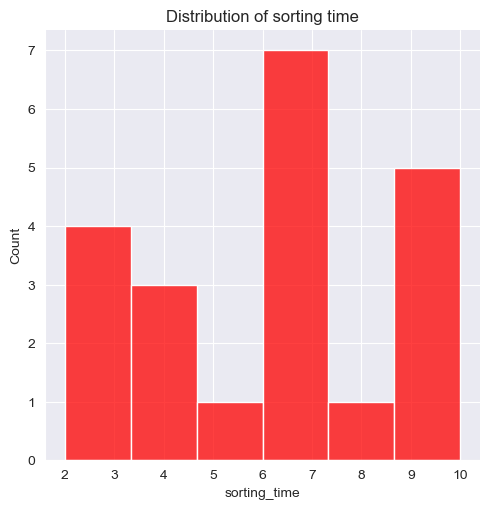

In [10]:
# distribution of sorting time--
sns.displot(x=data["sorting_time"], color="red")
plt.title("Distribution of sorting time")
print(data["sorting_time"].skew())

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

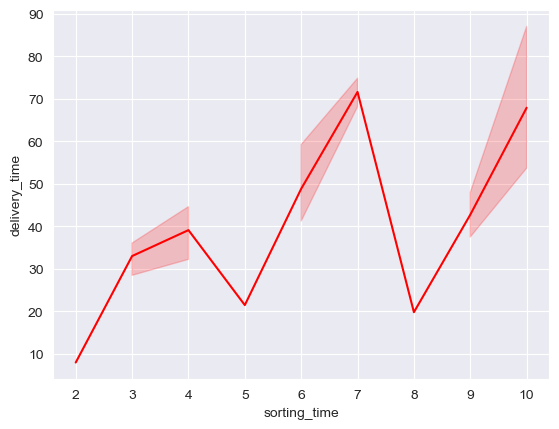

In [11]:
sns.lineplot(x="sorting_time",y="delivery_time",data=data,estimator="sum",color="red")

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

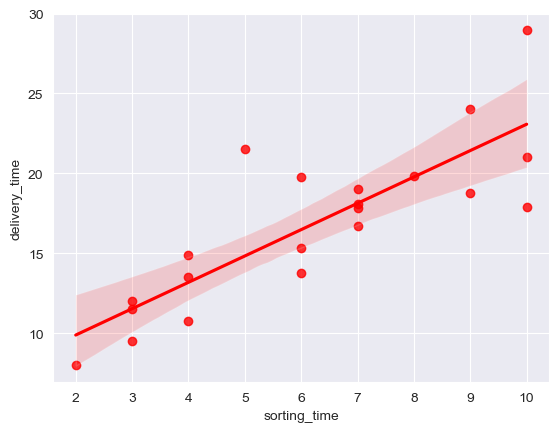

In [12]:
sns.regplot(x="sorting_time",y="delivery_time",data=data,color="red")

<AxesSubplot:>

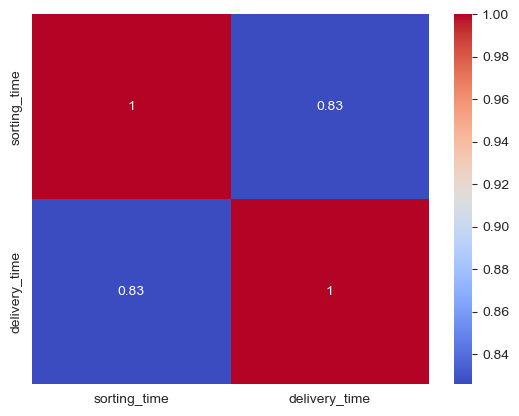

In [13]:
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

  ## Q Predict delivery time using sorting time:

In [14]:
# Simple linear regression
# creating dataframe--
df=data
print(df.head())

   sorting_time  delivery_time
0            10          21.00
1             4          13.50
2             6          19.75
3             9          24.00
4            10          29.00


In [15]:
df.shape

(21, 2)

In [16]:
#sampling of data
training,testing=train_test_split(df,test_size=0.2)

In [17]:
print(training.head())
training.shape

    sorting_time  delivery_time
10             8          19.83
14             3          12.03
1              4          13.50
2              6          19.75
17             7          18.11


(16, 2)

In [18]:
print(testing.head())
testing.shape

    sorting_time  delivery_time
12             7          16.68
15             4          14.88
0             10          21.00
11             4          10.75
19             7          17.83


(5, 2)

In [19]:
#Defining--
X=training["sorting_time"]
y=training["delivery_time"]
X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
#Create object of Linear Regression model
model=LinearRegression()
print(model)

LinearRegression()


In [22]:
train_model=model.fit(X,y)
print('Model training is completed')
print(train_model)

Model training is completed
LinearRegression()


In [23]:
print(model.coef_)
print(model.intercept_)

[[1.72622892]]
[6.39372289]


In [24]:
x1= 8       #y=mx+b
y=1.69030752*x1 + 5.95241458
print("The delivery time for {} is {}".format(x1,y))

The delivery time for 8 is 19.47487474


In [25]:
X_test=testing["sorting_time"].values.reshape(-1,1)
X_test

array([[ 7],
       [ 4],
       [10],
       [ 4],
       [ 7]], dtype=int64)

In [26]:
pred_delivery_time=train_model.predict(X_test)
pred_delivery_time

array([[18.4773253 ],
       [13.29863855],
       [23.65601205],
       [13.29863855],
       [18.4773253 ]])

In [27]:
testing["pred_del_time"]=pred_delivery_time
testing

,sorting_time,delivery_time,pred_del_time
12,7,16.68,18.477325
15,4,14.88,13.298639
0,10,21.00,23.656012
11,4,10.75,13.298639
19,7,17.83,18.477325


In [28]:
testing["Error"]=testing["delivery_time"]-testing["pred_del_time"]
testing

,sorting_time,delivery_time,pred_del_time,Error
12,7,16.68,18.477325,-1.797325
15,4,14.88,13.298639,1.581361
0,10,21.00,23.656012,-2.656012
11,4,10.75,13.298639,-2.548639
19,7,17.83,18.477325,-0.647325


In [29]:
round(r2_score(testing["delivery_time"],testing["pred_del_time"])*100,2)

65.66

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

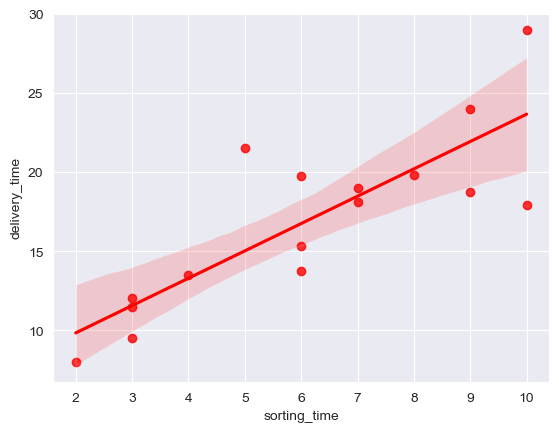

In [30]:
sns.regplot(x="sorting_time",y="delivery_time",data=training,color="red")

<AxesSubplot:xlabel='sorting_time', ylabel='pred_del_time'>

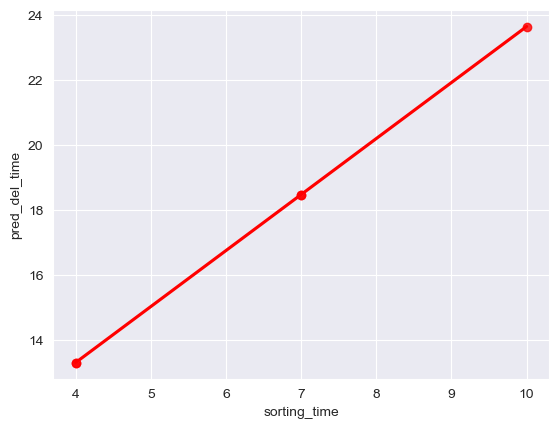

In [31]:
sns.regplot(x="sorting_time",y="pred_del_time",data=testing,color="red")

#### Using whole data for training:

In [32]:
data_=data
print(data_.head())

   sorting_time  delivery_time
0            10          21.00
1             4          13.50
2             6          19.75
3             9          24.00
4            10          29.00


In [33]:
X1=data_["sorting_time"].values.reshape(-1,1)
y1=data_["delivery_time"].values.reshape(-1,1)
X1.shape,y1.shape

((21, 1), (21, 1))

In [34]:
model1= LinearRegression()
model_train1=model1.fit(X1,y1)
print("model training completed") 

model training completed


In [35]:
model1.coef_

array([[1.6490199]])

In [36]:
model1.intercept_

array([6.58273397])

In [37]:
x1_= 8      #y=mx+b
y1=1.6490199*x1_ + 6.58273397
print("The delivery time for {} is {}".format(x1,y))

The delivery time for 8 is 19.47487474


In [38]:
pred=model_train1.predict(X1)
pred

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

In [39]:
data_["pred_deliverytime"]=pred
print(data_.head())

   sorting_time  delivery_time  pred_deliverytime
0            10          21.00          23.072933
1             4          13.50          13.178814
2             6          19.75          16.476853
3             9          24.00          21.423913
4            10          29.00          23.072933


In [40]:
round(r2_score(data_["delivery_time"],data_["pred_deliverytime"])*100,2)

68.23

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

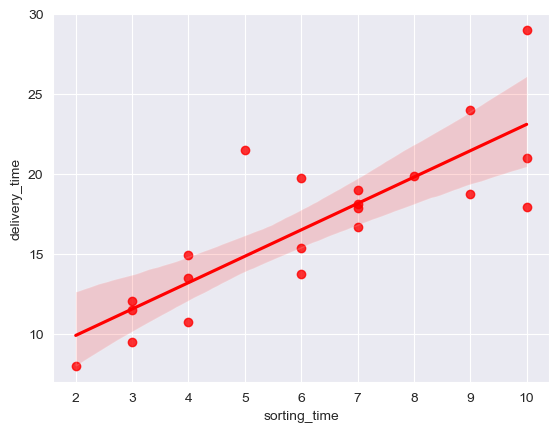

In [41]:
sns.regplot(x="sorting_time",y="delivery_time",data=data_,color="red")

<AxesSubplot:xlabel='sorting_time', ylabel='pred_deliverytime'>

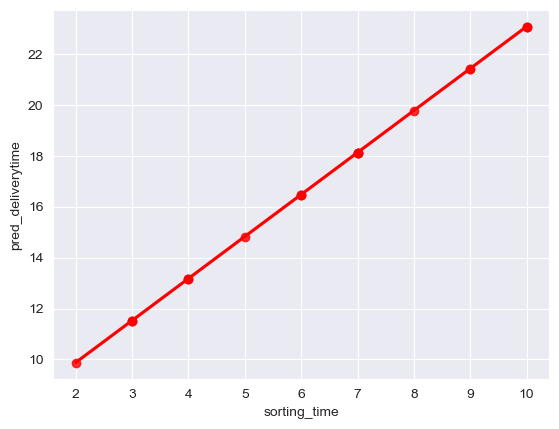

In [42]:
sns.regplot(x="sorting_time",y="pred_deliverytime",data=data_,color="red")